In [9]:

import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

import classical

In [78]:
plt.rcParams['figure.figsize'] = (10, 3)

tmax = 50

wc = 1
wz = 1 * wc
lamc = 0.5 * np.sqrt(wc * wz)
lam = 1.5 * lamc

m0 = np.array([1, 0, 0, 0, 0]) # m0 is the state with maximum mx
#m0 = np.array([0, 0, 1, 0, 0]) # m0 is the state with maximum mz

t_eval = np.linspace(0, tmax, 10000)
max_step = 0.001
sol = solve_ivp(classical.Dicke_classical_eqsmot, (0, tmax), m0, method='RK45', args=(2*np.pi * wz, 2*np.pi * wc, 2*np.pi * lam, 0.0), t_eval=t_eval, max_step=max_step)


In [95]:
plt.rcParams['figure.figsize'] = (10, 3)

tmax = 15

N = 100

m0 = np.zeros(24) 
m0[0] = 1 # m0 is the state with maximum mx
m0[5] = 1 # and thus also mx^2
m0[11] = 2/N # the variance is non zero for finite N
m0[17] = 2/N # the variance is non zero for finite N
m0[16] = 4j/N # the variance is non zero for finite N
m0[12] = -4j/N # the variance is non zero for finite N

t_eval = np.linspace(0, tmax, 10000)
max_step = 0.001
sol_2 = solve_ivp(classical.Dicke_classical_eqsmot_second_order, (0, tmax), m0, method='DOP853', args=(2*np.pi * wz, 2*np.pi * wc, 2*np.pi * lam), t_eval=t_eval, max_step=max_step)

/Users/jroman/Desktop/Code/dicke-dynamics/classical.py:49: ComplexWarning: Casting complex values to real discards the imaginary part
  dv[0] = -wz*v[1] # mx
/Users/jroman/Desktop/Code/dicke-dynamics/classical.py:50: ComplexWarning: Casting complex values to real discards the imaginary part
  dv[1] = wz*v[0] - 2*lam*v[18] # my
/Users/jroman/Desktop/Code/dicke-dynamics/classical.py:51: ComplexWarning: Casting complex values to real discards the imaginary part
  dv[2] = 2*lam*v[13] # mz
/Users/jroman/Desktop/Code/dicke-dynamics/classical.py:52: ComplexWarning: Casting complex values to real discards the imaginary part
  dv[3] = -wc*v[4] # x
/Users/jroman/Desktop/Code/dicke-dynamics/classical.py:53: ComplexWarning: Casting complex values to real discards the imaginary part
  dv[4] = wc*v[3] + 2*lam*v[0] # p
/Users/jroman/Desktop/Code/dicke-dynamics/classical.py:54: ComplexWarning: Casting complex values to real discards the imaginary part
  dv[5] = -wz*v[6] - wz*v[10] # mx mx
/Users/jroma

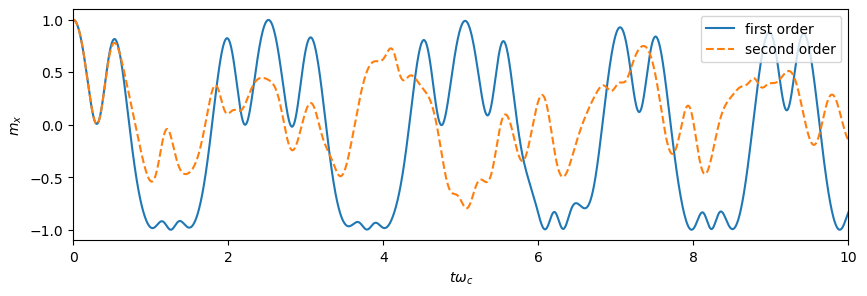

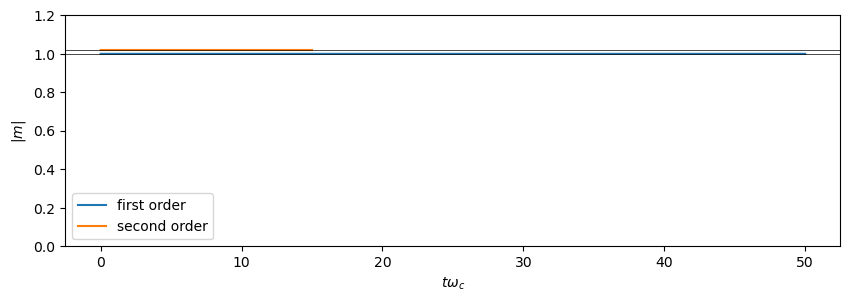

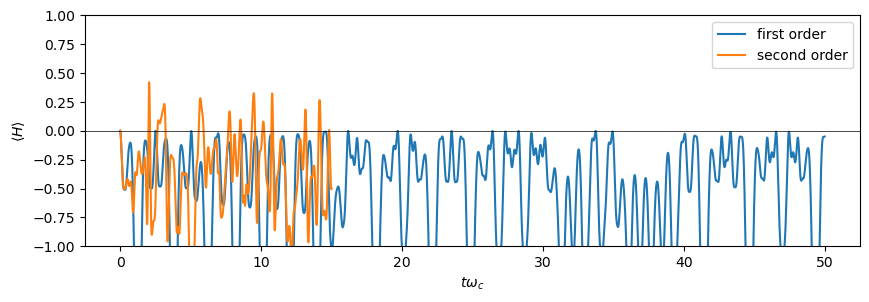

In [97]:
plt.plot(sol.t, sol.y[0], label='first order')
plt.plot(sol_2.t, sol_2.y[0], label='second order', ls='dashed')
plt.ylabel(r'$m_x$')
plt.xlabel(r'$t \omega_c$')
start = 0
window = 10
plt.xlim(start, start+window)
plt.ylim(-1.1, 1.1)
plt.legend()
plt.show()

plt.plot(sol.t, np.linalg.norm(sol.y[:3], axis=0), label='first order')
plt.plot(sol_2.t, np.sqrt(sol_2.y[5] + sol_2.y[11] + sol_2.y[17]), label='second order')
plt.ylabel(r'$|m|$')
plt.xlabel(r'$t \omega_c$')
plt.axhline(1.0 + 2/N, c='k', lw=0.5)
plt.axhline(1.0, c='k', lw=0.5)
plt.ylim(0., 1.2)
plt.legend()
plt.show()

plt.plot(sol.t, wz*sol.y[2] + 0.25*wc*(sol.y[3]**2 + sol.y[4]**2) + 2*lam*sol.y[0]*sol.y[3], label='first order')
plt.plot(sol_2.t, wz*sol_2.y[2] + 0.25*wc*(sol_2.y[3]**2 + sol_2.y[4]**2) + 2*lam*sol_2.y[0]*sol_2.y[3], label='second order')
plt.ylabel(r'$\langle H \rangle$')
plt.xlabel(r'$t \omega_c$')
plt.axhline(0.0, c='k', lw=0.5)
plt.ylim(-1, 1)
plt.legend()
plt.show()